In [2]:
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt


In [3]:
import json

epoch0_paths = open('trees/trees.0.txt').readlines()
epoch1_paths = open('trees/trees.1.txt').readlines()
epoch2_paths = open('trees/trees.2.txt').readlines()

epoch0 = []
epoch1 = []
epoch2 = []

for tree_file in epoch0_paths:
    epoch0.append(json.load(open(tree_file.strip())))

for tree_file in epoch1_paths:
    epoch1.append(json.load(open(tree_file.strip())))

for tree_file in epoch2_paths:
    epoch2.append(json.load(open(tree_file.strip())))
    

In [4]:
counts = np.loadtxt('../raw_data/counts.txt')
# header = np.loadtxt('./header_backup.npy')

In [5]:
# for tree in epoch0:
#     print tree['features']

Translated


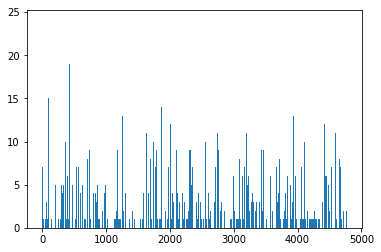

In [10]:
flat_features = []

for tree in epoch2:
    flat_features.extend([int(x) for x in tree['features']])

print "Translated"
    
plt.figure()
plt.hist(flat_features, bins=1000)
plt.show()

625000
Translated
625000
Translated
625000
Translated


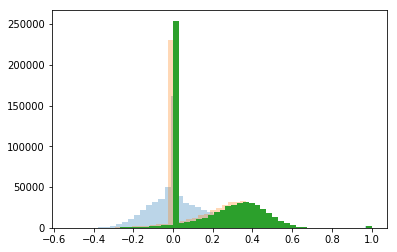

In [7]:
correlations = np.corrcoef(counts.T)

in_tree_correlations = []

for tree in epoch0:
    for f1 in tree['features']:
        for f2 in tree['features']:
            in_tree_correlations.append(similarities[int(f1),int(f2)])

print len(in_tree_correlations)
    
print "Translated"
    
plt.figure('correlations')
plt.hist(in_tree_correlations, bins=50,alpha=.3)

correlations = np.corrcoef(counts.T)

in_tree_correlations = []

for tree in epoch1:
    for f1 in tree['features']:
        for f2 in tree['features']:
            in_tree_correlations.append(similarities[int(f1),int(f2)])

print len(in_tree_correlations)
    
print "Translated"
    
plt.figure('correlations')
plt.hist(in_tree_correlations, bins=50,alpha=.3)

correlations = np.corrcoef(counts.T)

in_tree_correlations = []

for tree in epoch2:
    for f1 in tree['features']:
        for f2 in tree['features']:
            in_tree_correlations.append(similarities[int(f1),int(f2)])

print len(in_tree_correlations)
    
print "Translated"
    
plt.figure('correlations')
plt.hist(in_tree_correlations, bins=50)
plt.show()

In [6]:
similarities = np.loadtxt('./trees/run.0.0.similarity')



In [10]:

def tree_to_leaves(tree,tree_id,requirements=None):
    
    nodes = []

    if requirements == None:
        requirements = []
    
    children = [x for x in tree['children']]
        
    tree['requirements'] = requirements
    tree['tree_id'] = tree_id
    
    if len(children) == 0:
        nodes.append(tree)
    
    if len(children) > 0:
        nodes.extend([x for x in tree_to_leaves(children[0],tree_id,requirements + [tree['feature'],"<"])]) 
        nodes.extend([x for x in tree_to_leaves(children[1],tree_id,requirements + [tree['feature'],">"])])

    return nodes


def forest_to_leaves(trees):
    nodes = []
    for i,tree in enumerate(trees):
        nodes.extend([x for x in tree_to_leaves(tree,i)])
    
    return nodes


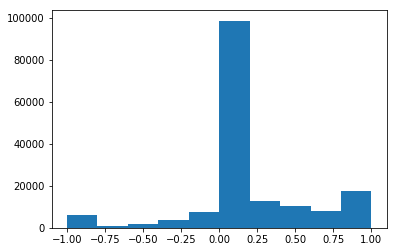

In [16]:
leaves0 = forest_to_leaves(epoch0)

absolute_gains_0 = []

for node in leaves0:
    absolute_gains_0.extend(node['absolute_gains'])
    
plt.figure()
plt.hist(absolute_gains_0)
plt.show()

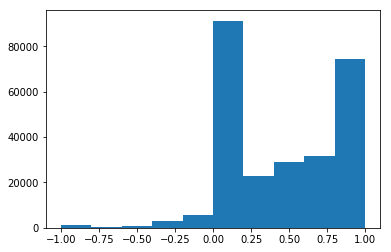

In [15]:
leaves1 = forest_to_leaves(epoch1)

absolute_gains_1 = []

for node in leaves1:
    absolute_gains_1.extend(node['absolute_gains'])
    
plt.figure()
plt.hist(absolute_gains_1)
plt.show()

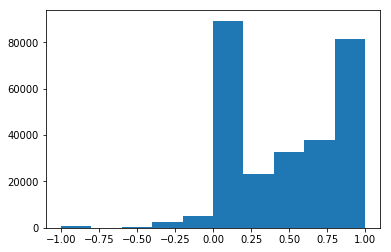

In [14]:
leaves2 = forest_to_leaves(epoch2)

absolute_gains_2 = []

for node in leaves2:
    absolute_gains_2.extend(node['absolute_gains'])
    
plt.figure()
plt.hist(absolute_gains_2)
plt.show()

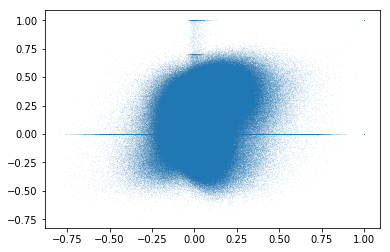

In [17]:
absolute_similarity = np.loadtxt('./trees/similarity_absolute')

plt.figure()
plt.scatter(correlations.flatten(),absolute_similarity.flatten(), s=.01,alpha=.1)
plt.show()


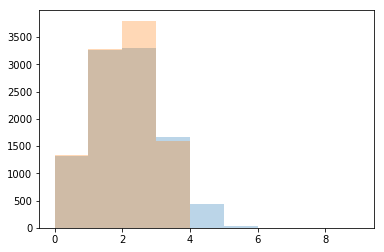

1.6771
1.5652


In [45]:
import random as rnd

large_list = []
reroll_list = []

for i in range(10000):
    large = 0
    reroll = 0
    for i in range(5):
        if rnd.random() > 0.6666:
            large += 1
    for i in range(3):
        if rnd.random() > 0.6666:
            reroll += 1
    if reroll < 2:
        if rnd.random() > 0.6666:
            reroll += 1
        if rnd.random() > 0.6666:
            reroll += 1
    elif reroll < 3:
        if rnd.random() > 0.6666:
            reroll += 1
    
    large_list.append(large)
    reroll_list.append(reroll)
    
plt.figure()
plt.hist(large_list, alpha = .3, bins=range(10))
plt.hist(reroll_list, alpha = .3, bins=range(10))
plt.show()

print np.mean(large_list)
print np.mean(reroll_list)